<a href="https://colab.research.google.com/github/bernardosnap/MVP---Sprint-Analise-de-Dados-e-Boas-Praticas/blob/main/An%C3%A1lise_de_Dados_Cidades_Brasileiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados e Boas Práticas**

# Definição do Problema

**Clusterização de Cidades pelo Uso do Dinheiro Público**

A clusterização de cidades com base no uso do dinheiro público visa identificar padrões de alocação de recursos financeiros entre diferentes municípios brasileiros. O objetivo é agrupar cidades com perfis semelhantes em relação a despesas municipais, arrecadação de impostos e indicadores de desenvolvimento socioeconômico. Essa análise pode fornecer insights sobre como fatores econômicos, populacionais e de desenvolvimento humano influenciam a gestão dos recursos públicos. Utilizando técnicas de clusterização, espera-se encontrar grupos de cidades que compartilham características similares, permitindo a identificação de boas práticas ou de casos que demandam maior eficiência na gestão pública.

Para o problema em questão, algumas premissas e hipóteses são levantadas, dentre elas:

**Premissas:**

*  A arrecadação de impostos reflete a capacidade econômica de uma cidade e influencia diretamente suas despesas municipais.
*  Cidades com PIB mais alto tendem a gastar mais em serviços públicos, uma vez que dispõem de mais recursos para investir em infraestrutura e serviços.
*  O IDH está relacionado à eficiência na alocação dos recursos públicos, com cidades mais desenvolvidas apresentando um uso mais eficiente dos recursos.

**Hipóteses:**

*  Cidades que arrecadam mais impostos têm, em geral, maiores despesas municipais, o que pode refletir uma maior capacidade de investimento em serviços públicos.
*  Cidades com um alto PIB e alta população formarão clusters distintos em comparação com cidades menores, com disparidades claras em relação à alocação de recursos.
*  Cidades com IDH elevado estarão em clusters que mostram uma melhor eficiência no uso do dinheiro público, refletida por uma correlação positiva entre arrecadação de impostos, gastos e serviços públicos oferecidos





**Restrições e Condições para Seleção de Dados**

A fim de garantir uma qualidade e confiabilidade do modelo, algumas restrições e condições foram usadas para seleção dos dados:

*   **Qualidade dos dados:** os dados utilizados para treinar o modelo são precisos e consistentes.
*   **Diversidade do dataset:** o dataset inclui cidades de todos os estados brasileiros e com valores recentemente atualizados, garantindo que o modelo seja capaz de generalizar para novas situações.




**Importação de bibliotecas**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from IPython.display import display
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

**Apresentação dos datasets**

In [2]:
cidades_brasileiras = 'https://raw.githubusercontent.com/bernardosnap/MVP---Sprint-Analise-de-Dados-e-Boas-Praticas/main/BRAZIL_CITIES_REV2022.CSV'
cidadesBR = pd.read_csv(cidades_brasileiras)

cidadesBR.sample(10)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
1029,Capivari De Baixo,SC,0,21674,21663,11,6926,6354,572,19810,...,2,0,332863930,9539,5468,9,0,0,0,1
2142,Imbaú,PR,0,11274,11274,0,3455,2150,1305,7034,...,0,16235822,0,3194,1451,0,0,0,0,1
2185,Ipanguaçu,RN,0,13856,13856,0,3791,1474,2317,5351,...,1,0,33260182,1220,2213,0,0,0,0,2
246,Aporá,BA,0,17731,17731,0,5183,2519,2664,8471,...,0,0,0,831,1687,0,0,0,0,2
1550,Dois Irmãos Do Buriti,MS,0,10363,10329,34,2592,1494,1098,4686,...,1,0,54057946,1690,1387,0,0,0,0,2
3350,Nova Ubiratã,MT,0,9218,9213,5,2747,1725,1022,5519,...,1,0,169846365,1221,1457,0,0,0,0,4
1924,Grandes Rios,PR,0,6625,6616,9,2077,1189,888,3512,...,1,0,85898357,1627,826,0,0,0,0,2
1242,Coari,AM,0,75965,75840,125,15103,10423,4680,46907,...,3,47096100,157071917,547,9052,0,0,0,0,1
3272,Nova Canaã Do Norte,MT,0,12127,12122,5,3901,2234,1667,6187,...,1,0,124163986,2024,4307,0,0,0,0,4
3638,Paulo Bento,RS,0,2196,2196,0,699,208,491,594,...,0,0,0,705,276,0,0,0,0,1


In [3]:
# Verifica o número de linhas e o tipo de cada coluna do dataframe
cidadesBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5578 non-null   object 
 1   STATE                   5578 non-null   object 
 2   CAPITAL                 5578 non-null   int64  
 3   IBGE_RES_POP            5578 non-null   int64  
 4   IBGE_RES_POP_BRAS       5578 non-null   int64  
 5   IBGE_RES_POP_ESTR       5578 non-null   int64  
 6   IBGE_DU                 5578 non-null   int64  
 7   IBGE_DU_URBAN           5578 non-null   int64  
 8   IBGE_DU_RURAL           5578 non-null   int64  
 9   IBGE_POP                5578 non-null   int64  
 10  IBGE_1                  5578 non-null   int64  
 11  IBGE_1-4                5578 non-null   int64  
 12  IBGE_5-9                5578 non-null   int64  
 13  IBGE_10-14              5578 non-null   int64  
 14  IBGE_15-59              5578 non-null   

**COLUNAS DO DATAFRAME**

* **CITY** - Nome da Cidade
* **STATE** - Nome do Estado
* **CAPITAL** - 1 se for a Capital do Estado
* **IBGE_RES_POP** - População Residente - 2010
* **IBGE_RES_POP_BRAS** - População Residente Brasileira - 2010
* **IBGE_RES_POP_ESTR** - População Residente Estrangeira - 2010
* **IBGE_DU** - Unidades Domiciliares Totais - 2010
* **IBGE_DU_URBAN** - Unidades Domiciliares Urbanas - 2010
* **IBGE_DU_RURAL** - Unidades Domiciliares Rurais - 2010
* **IBGE_POP** - População Residente em Planejamento Urbano Regular - 2010
* **IBGE_1** - População Residente em Planejamento Urbano Regular - até 1 ano - 2010
* **IBGE_1-4** - População Residente em Planejamento Urbano Regular - de 1 a 4 anos - 2010
* **IBGE_5-9** - População Residente em Planejamento Urbano Regular - de 4 a 9 anos - 2010
* **IBGE_10-14** - População Residente em Planejamento Urbano Regular - de 10 a 14 anos - 2010
* **IBGE_15-59** - População Residente em Planejamento Urbano Regular - de 15 a 59 anos - 2010
* **IBGE_60+** - População Residente em Planejamento Urbano Regular - acima de 60 anos - 2010
* **IBGE_PLANTED_AREA** - Área Plantada (hectares) - 2017
* **IBGE_CROP_PRODUCTION** - Produção Agrícola - 2017 - 1.000 reais
* **IDHM Ranking** - Ranking do IDH - 2010
* **IDHM** - Índice de Desenvolvimento Humano - IDH - 2010
* **IDHM_Renda** - Índice de Desenvolvimento Humano - Renda - 2010
* **IDHM_Longevidade** - Índice de Desenvolvimento Humano - Longevidade - 2010
* **IDHM_Educacao** - Índice de Desenvolvimento Humano - Educação - 2010
* **LONG** - Longitude da Cidade - 2010
* **LAT** - Latitude da Cidade - 2010
* **ALT** - Altitude da Cidade (metros) - 2010 - 1 metro
* **PAY_TV** - Usuários de TV por Assinatura - 2019-03
* **FIXED_PHONES** - Usuários de Telefones Fixos (não celulares) - 2019-03
* **AREA** - Área da Cidade (quilômetros quadrados) - 2018 - 1 quilômetro quadrado (1 quilômetro = 1.000.000 metros quadrados)
* **REGIAO_TUR** - Categoria da Região Turística - 2017
* **CATEGORIA_TUR** - Categoria de Turismo - 2017
* **ESTIMATED_POP** - População Estimada - 2018-07
* **RURAL_URBAN** - Tipologia Rural ou Urbana - 2016
* **GVA_AGROPEC** - Valor Adicionado Bruto - Agropecuária - 2016 - 1.000 reais
* **GVA_INDUSTRY** - Valor Adicionado Bruto - Indústria - 2016 - 1.000 reais
* **GVA_SERVICES** - Valor Adicionado Bruto - Serviços - 2016 - 1.000 reais
* **GVA_PUBLIC** - Valor Adicionado Bruto - Serviços Públicos - 2016 - 1.000 reais
* **GVA_TOTAL** - Valor Adicionado Bruto Total - 2016 - 1.000 reais
* **TAXES** - Impostos - 2016 - 1.000 reais
* **GDP** - Produto Interno Bruto - 2016 - 1.000 reais
* **POP_GDP** - População - 2016
* **GDP_CAPITA** - Produto Interno Bruto per capita - 2016
* **GVA_MAIN** - Atividade com maior contribuição para o VAB - 2016
* **MUN_EXPENDIT** - Despesas Municipais - em reais - 2016 - 1 real
* **COMP_TOT** - Número total de empresas - 2016
* **COMP_A** - Número de Empresas: Agricultura, pecuária, silvicultura, pesca e aquicultura - 2016
* **COMP_B** - Número de Empresas: Indústrias extrativas - 2016
* **COMP_C** - Número de Empresas: Indústrias de transformação - 2016
* **COMP_D** - Número de Empresas: Eletricidade e gás - 2016
* **COMP_E** - Número de Empresas: Água, esgoto, gestão de resíduos e atividades de descontaminação - 2016
* **COMP_F** - Número de Empresas: Construção - 2016
* **COMP_G** - Número de Empresas: Comércio; reparação de veículos automotores e motocicletas - 2016
* **COMP_H** - Número de Empresas: Transporte, armazenagem e correio - 2016
* **COMP_I** - Número de Empresas: Alojamento e alimentação - 2016
* **COMP_J** - Número de Empresas: Informação e comunicação - 2016
* **COMP_K** - Número de Empresas: Atividades financeiras, de seguros e serviços relacionados - 2016
* **COMP_L** - Número de Empresas: Atividades imobiliárias - 2016
* **COMP_M** - Número de Empresas: Atividades profissionais, científicas e técnicas - 2016
* **COMP_N** - Número de Empresas: Atividades administrativas e serviços complementares - 2016
* **COMP_O** - Número de Empresas: Administração pública, defesa e seguridade social - 2016
* **COMP_P** - Número de Empresas: Educação - 2016
* **COMP_Q** - Número de Empresas: Saúde humana e serviços sociais - 2016
* **COMP_R** - Número de Empresas: Artes, cultura, esporte e recreação - 2016
* **COMP_S** - Número de Empresas: Outras atividades de serviços - 2016
* **COMP_T** - Número de Empresas: Serviços domésticos - 2016
* **COMP_U** - Número de Empresas: Instituições internacionais e outras instituições extraterritoriais - 2016
* **HOTELS** - Número total de hotéis - 2019-03
* **BEDS** - Número total de leitos em hotéis - 2019-03
* **Pr_Agencies** - Número total de agências bancárias privadas - 2019-02
* **Pu_Agencies** - Número total de agências bancárias públicas - 2019-02
* **Pr_Bank** - Número total de bancos privados - 2019-02
* **Pu_Bank** - Número total de bancos públicos - 2019-02
* **Pr_Assets** - Valor total dos ativos dos bancos privados - 2019-02 - 1 real
* **Pu_Assets** - Valor total dos ativos dos bancos públicos - 2019-02 - 1 real
* **Cars** - Número total de carros - 2019-01
* **Motorcycles** - Número total de motocicletas, scooters, ciclomotores - 2019-01
* **Wheeled_tractor** - Número total de tratores de rodas - 2019-01
* **UBER** - 1 se houver UBER - 2019-05
* **MAC** - Número total de lojas do McDonald's - 2018-11
* **WALLMART** - Número total de lojas do Walmart - 2018-12
* **POST_OFFICES** - Número total de agências dos correios - 2019-05




# Limpeza dos Dados

Primeiramente, a fim de facilitar a visualização, devemos verificar se e onde temos colunas em branco. Essas linhas serão analisadas uma a uma e terão 2 destinos possíveis:
- preenchidas com valores nulos ou com a média das valores, a depender da natureza da coluna e do cenário referente ao jogador.
- deletadas usando _dropna_

In [5]:
# Colunas vazias
colunas_com_nan = cidadesBR.isnull().any()

print(colunas_com_nan[colunas_com_nan])

Series([], dtype: bool)


Felizmente, o dataframe escolhido não apresenta colunas com valores em branco. Esse fato é muito bom, visto que, caso apresentasse a média dos valores poderia influenciar no resultado final da clusterização.



In [6]:
# Visualizando quantas cidades têm por estado
cidades_por_estado = cidadesBR['STATE'].value_counts()
cidades_por_estado

,count
STATE,
MG,853
SP,646
RS,499
BA,418
PR,400
SC,295
GO,246
PI,224
PB,224


Vemos também, que o dataframe está minimamente bem distribuído em relação ao número de cidades por estado, o que comprova a qualidade e diversidade dos dados.

É difícil verificar tendências no formato em que está o dataframe. Para facilitar a visualização deveremos dropar algumas colunas que não são tidas como necessárias para a solução do problema proposto.

Apesar de não estarem diretamente ligadas aos gastos públicos, algumas colunas serão mantidas, tais como: cidade e estado, área, população residente e IDH.

Descarta-se então:
-  **geográficas e infraestrutura:** latitude, longitude, altitude e outros indicadores de infraestrutura como número de carros e agências bancárias não são diretamente relevantes para a análise do uso do dinheiro público.
-  **demografia detalhada e faixas etárias:** para simplificar a análise, as informações detalhadas de faixas etárias podem ser descartadas.
-  **empresas por setor:** o número de empresas por setor econômico pode ser mais detalhado do que necessário para uma análise de clusterização com foco em dinheiro público.
-  **produção agrícola e área plantada:** não estão diretamente relacionadas ao uso do dinheiro público, exceto em análises de setores econômicos específicos.
-  **turismo:** a categoria de turismo e região turística não estão diretamente ligadas ao uso do dinheiro público.

In [7]:
# Lista de colunas a dropar
drop_columns = [
    'LONG', 'LAT', 'ALT',
    'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
    'IBGE_15-59', 'IBGE_60+', 'POP_GDP', 'ESTIMATED_POP',
    'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D', 'COMP_E',
    'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
    'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q',
    'COMP_R', 'COMP_S', 'COMP_T', 'COMP_U', 'GVA_MAIN',
    'PAY_TV', 'FIXED_PHONES', 'Pr_Agencies', 'Pu_Agencies',
    'Pr_Bank', 'Pu_Bank', 'Pr_Assets', 'Pu_Assets',
    'Cars', 'Motorcycles', 'Wheeled_tractor', 'POST_OFFICES', 'UBER',
    'MAC', 'WAL-MART',
    'REGIAO_TUR', 'CATEGORIA_TUR',
    'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$', 'RURAL_URBAN', 'HOTELS', 'BEDS'
]

# Remover as colunas irrelevantes
cidadesBR = cidadesBR.drop(columns=drop_columns)

cidadesBR.sample(10)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,AREA,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,GDP_CAPITA,MUN_EXPENDIT
904,Campina Das Missões,RS,0,6117,6115,2,2080,810,1270,2447,...,224.801,59341,6256,45287,28294,139179,6386,145565,24136.0,16746504
3881,Ponto Novo,BA,0,15742,15742,0,4518,2625,1893,8367,...,530.144,14889,9205,32902,48914,105911,5341,111251,7000.0,0
1053,Carazinho,RS,0,59317,59249,68,20176,19826,350,55765,...,665.515,141719,255125,1571416,289809,2258070,387160,2645230,42533.0,153372211
5134,Tapurah,MT,0,10392,10369,23,2616,1844,772,6497,...,4489.391,412673,44461,200773,74013,731919,52983,784902,62136.0,44776138
4344,Santa Cruz De Minas,MG,0,7865,7862,3,2520,2520,0,7861,...,3.565,218,5177,36085,29902,71382,3499,74881,8821.0,12648258
2051,Ibaté,SP,0,30734,30734,0,8813,8480,333,29492,...,290.978,51151,238506,307949,117859,715465,58763,774228,22849.0,80921343
1950,Guanambi,BA,0,78833,78833,0,22330,17952,4378,62382,...,1272.366,30821,176533,627067,251905,1086325,112333,1198658,13886.0,154765022
633,Bom Despacho,MG,0,45624,45586,38,14555,13601,954,42068,...,1213.546,123037,160741,571370,185221,1040369,106616,1146986,23101.0,0
430,Balneário Arroio Do Silva,SC,0,9586,9556,30,3333,3257,76,7632,...,94.329,13703,11914,61192,49962,136771,6070,142841,11921.0,28681443
2340,Itapiranga,SC,0,15409,15404,5,4934,2637,2297,7055,...,281.782,130601,202010,244945,76274,653830,70285,724115,43777.0,50825013


In [8]:
cidadesBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CITY               5578 non-null   object 
 1   STATE              5578 non-null   object 
 2   CAPITAL            5578 non-null   int64  
 3   IBGE_RES_POP       5578 non-null   int64  
 4   IBGE_RES_POP_BRAS  5578 non-null   int64  
 5   IBGE_RES_POP_ESTR  5578 non-null   int64  
 6   IBGE_DU            5578 non-null   int64  
 7   IBGE_DU_URBAN      5578 non-null   int64  
 8   IBGE_DU_RURAL      5578 non-null   int64  
 9   IBGE_POP           5578 non-null   int64  
 10  IDHM Ranking 2010  5578 non-null   int64  
 11  IDHM               5578 non-null   float64
 12  IDHM_Renda         5578 non-null   float64
 13  IDHM_Longevidade   5578 non-null   float64
 14  IDHM_Educacao      5578 non-null   float64
 15  AREA               5578 non-null   float64
 16  GVA_AGROPEC        5578 

A fim de obter um resumo estatístico básico do dataframe, utilizamos o método describe(). Ele é uma ferramenta essencial na análise exploratória, visto que oferece informações valiosas sobre a distribuição de dados. As métricas fornecidas pelo mesmo serão essenciais para identificar elementos como tendências, outliers, dispersões e valores ausentes.

In [ ]:
cidadesBR.describe()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IDHM Ranking 2010,IDHM,...,AREA,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,GDP_CAPITA,MUN_EXPENDIT
count,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5578.000000,5578.000000,...,5578.000000,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03
mean,0.005916,3.422313e+04,3.414573e+04,77.404625,1.028313e+04,8.842319e+03,1440.807458,2.755270e+04,2777.296701,0.658013,...,1526.082637,5.500059e+04,2.063104e+05,5.410926e+05,1.695651e+05,9.719687e+05,1.523629e+05,1.124332e+06,21110.827895,7.631430e+07
std,0.076695,2.028829e+05,2.012627e+05,1793.789719,6.469199e+04,6.428575e+04,1690.483808,1.857468e+05,1609.523913,0.077159,...,5603.990697,9.202055e+04,1.296665e+06,7.133989e+06,1.558102e+06,9.411596e+06,1.964351e+06,1.135221e+07,20328.564075,7.409350e+08
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.415900e+04,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,5.217000e+03,5.214000e+03,0.000000,1.565250e+03,8.700000e+02,469.250000,2.784250e+03,1384.250000,0.599000,...,204.353750,1.061550e+04,3.645000e+03,1.784675e+04,2.449750e+04,7.284400e+04,2.949750e+03,7.595700e+04,9048.500000,0.000000e+00
50%,0.000000,1.092650e+04,1.091600e+04,0.000000,3.167000e+03,1.839500e+03,916.000000,6.156000e+03,2776.500000,0.665000,...,416.591000,2.702800e+04,1.170150e+04,4.662300e+04,4.724250e+04,1.589490e+05,8.660000e+03,1.682985e+05,15865.000000,1.773320e+07
75%,0.000000,2.340900e+04,2.338000e+04,10.000000,6.722500e+03,4.618750e+03,1811.750000,1.529875e+04,4170.750000,0.718000,...,1026.571500,6.137700e+04,6.349575e+04,1.470768e+05,9.973950e+04,4.132338e+05,3.212525e+04,4.456062e+05,26154.750000,4.145595e+07
max,1.000000,1.125350e+07,1.113378e+07,119727.000000,3.576148e+06,3.548433e+06,33809.000000,1.046364e+07,5565.000000,0.862000,...,159533.328000,1.402282e+06,6.330676e+07,4.646570e+08,9.205145e+07,5.699105e+08,1.171254e+08,6.870359e+08,314638.000000,4.577250e+10


Além disso, faremos uma outra descrição dos dados, explicitando os valores mínimos e máximos esperados para dados numéricos, exceto a coluna referente a capital, por ser binária.

In [21]:
# Ajusta o Pandas para exibir todas as colunas e quebra as linhas automaticamente
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Seleciona apenas as colunas numéricas (float e int)
numerical_cols = cidadesBR.select_dtypes(include=['float64', 'int64']).drop(columns=['CAPITAL'])

# Inicializa um dicionário para armazenar os valores mínimos, máximos e a cidade-estado correspondente
min_max_dict = {}

# Preenche o dicionário com as colunas alternadas de min e max, e adiciona CITY-STATE
for col in numerical_cols.columns:
    # Valor mínimo e sua cidade-estado
    min_value = numerical_cols[col].min()
    min_city_state = cidadesBR.loc[cidadesBR[col] == min_value, ['CITY', 'STATE']].iloc[0]
    min_city_state_str = f"{min_city_state['CITY']} - {min_city_state['STATE']}"

    # Valor máximo e sua cidade-estado
    max_value = numerical_cols[col].max()
    max_city_state = cidadesBR.loc[cidadesBR[col] == max_value, ['CITY', 'STATE']].iloc[0]
    max_city_state_str = f"{max_city_state['CITY']} - {max_city_state['STATE']}"

    # Adiciona os valores e suas cidades-estados ao dicionário
    min_max_dict[f'min_{col}'] = [min_value, min_city_state_str]
    min_max_dict[f'max_{col}'] = [max_value, max_city_state_str]

# Cria o DataFrame a partir do dicionário
min_max_df = pd.DataFrame(min_max_dict)

# Exibe o DataFrame completo
min_max_df

,min_IBGE_RES_POP,max_IBGE_RES_POP,min_IBGE_RES_POP_BRAS,max_IBGE_RES_POP_BRAS,min_IBGE_RES_POP_ESTR,max_IBGE_RES_POP_ESTR,min_IBGE_DU,max_IBGE_DU,min_IBGE_DU_URBAN,max_IBGE_DU_URBAN,min_IBGE_DU_RURAL,max_IBGE_DU_RURAL,min_IBGE_POP,max_IBGE_POP,min_IDHM Ranking 2010,max_IDHM Ranking 2010,min_IDHM,max_IDHM,min_IDHM_Renda,max_IDHM_Renda,min_IDHM_Longevidade,max_IDHM_Longevidade,min_IDHM_Educacao,max_IDHM_Educacao,min_AREA,max_AREA,min_GVA_AGROPEC,max_GVA_AGROPEC,min_GVA_INDUSTRY,max_GVA_INDUSTRY,min_GVA_SERVICES,max_GVA_SERVICES,min_GVA_PUBLIC,max_GVA_PUBLIC,min_GVA_TOTAL,max_GVA_TOTAL,min_TAXES,max_TAXES,min_GDP,max_GDP,min_GDP_CAPITA,max_GDP_CAPITA,min_MUN_EXPENDIT,max_MUN_EXPENDIT
0,0,11253503,0,11133776,0,119727,0,3576148,0,3548433,0,33809,0,10463636,0,5565,0.0,0.862,0.0,0.891,0.0,0.894,0.0,0.825,0.0,159533.328,0,1402282,0,63306755,0,464656988,0,92051448,0,569910503,-14159,117125387,0,687035890,0.0,314638.0,0,45772497944
1,Balneário Rincão - SC,São Paulo - SP,Balneário Rincão - SC,São Paulo - SP,Abadia De Goiás - GO,São Paulo - SP,Balneário Rincão - SC,São Paulo - SP,Balneário Rincão - SC,São Paulo - SP,Alvorada - RS,São José De Ribamar - MA,Balneário Rincão - SC,São Paulo - SP,Balneário Rincão - SC,Melgaço - PA,Balneário Rincão - SC,São Caetano Do Sul - SP,Balneário Rincão - SC,São Caetano Do Sul - SP,Balneário Rincão - SC,Balneário Camboriú - SC,Balneário Rincão - SC,Águas De São Pedro - SP,Santa Teresinha - BA,Altamira - PA,Lagoa Dos Patos - RS,Sapezal - MT,Lagoa Dos Patos - RS,São Paulo - SP,Lagoa Dos Patos - RS,São Paulo - SP,Lagoa Dos Patos - RS,Brasília - DF,Lagoa Dos Patos - RS,São Paulo - SP,Varre-Sai - RJ,São Paulo - SP,Lagoa Dos Patos - RS,São Paulo - SP,Lagoa Dos Patos - RS,Paulínia - SP,Abaetetuba - PA,São Paulo - SP


-  A menor população residente (min_IBGE_RES_POP) foi em Balneário Rincão, SC, enquanto a maior população residente foi em São Paulo, SP.

-  A cidade com a menor área (min_AREA) é Santa Teresinha, BA, e a maior área foi encontrada em Altamira, PA.

-  O menor valor de PIB per capita (min_GDP_CAPITA) foi em Varre-Sai, RJ, e o maior valor em Paulínia, SP.

-  O menor IDH (min_IDHM) foi em Melgaço, PA, e o maior em São Caetano do Sul, SP, o que reflete as disparidades no desenvolvimento entre municípios do Brasil.

-  A tabela ilustra a distribuição desigual de recursos, desenvolvimento humano e população entre diferentes regiões do Brasil.

-  São Paulo, tanto como estado quanto capital, se destaca com vários valores máximos em termos de população e riqueza (PIB).

-  Pequenos municípios, como Balneário Rincão e Lagoa Dos Patos, aparecem frequentemente com os valores mínimos em várias categorias.

# Visualização de Dados

Apesar de já termos um problema definido previamente, é de bom grado analisarmos a distribuição dos dados, a fim de checar se todos estão distribuídos conforme o esperado.

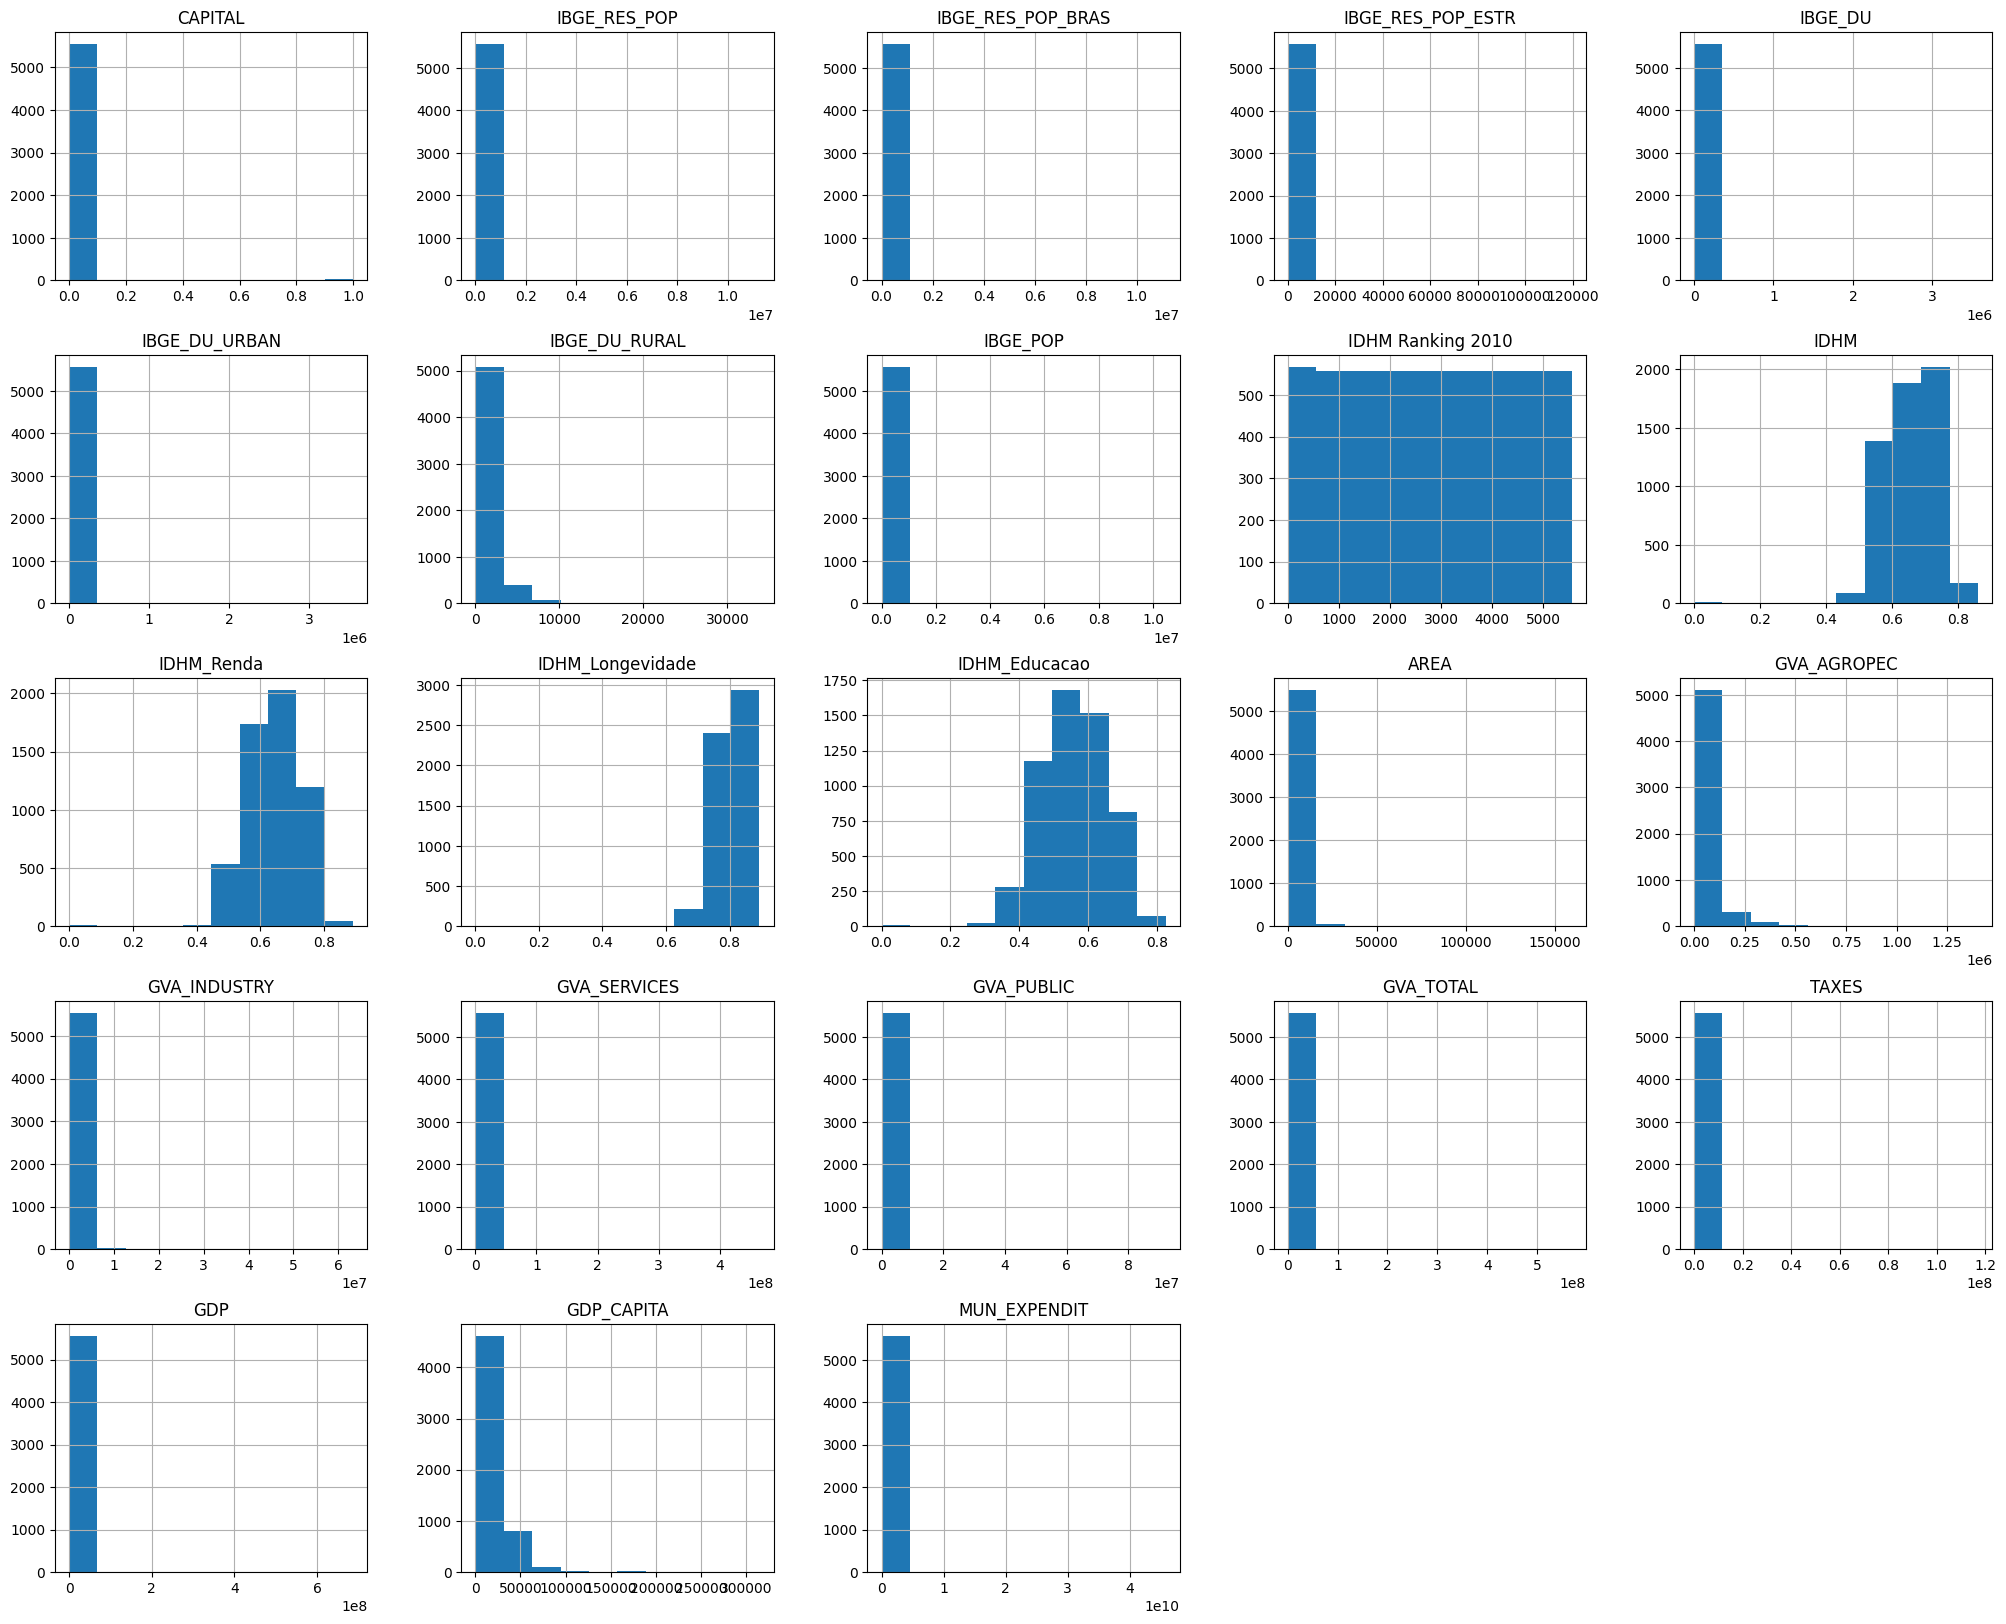

In [12]:
cidadesBR.hist(figsize = (25,20))
plt.show()

Analisando o histograma, observamos algumas coisas, tais como:

- **CAPITAL:** essa variável é binária, com a maioria dos municípios não sendo capitais (valor 0), e um número pequeno sendo capitais (valor 1).

- **IBGE_RES_POP, IBGE_RES_POP_BRAS, IBGE_RES_POP_ESTR:** a maioria dos municípios tem populações residentes relativamente pequenas, mas há alguns municípios com populações muito grandes, possivelmente capitais ou grandes centros urbanos.

- **IBGE_DU:** distribuição de domicílios urbanos, onde a maior parte dos municípios apresenta números relativamente baixos, mas com algumas cidades com valores bem maiores.

- **IBGE_DU_URBAN e IBGE_DU_RURAL:** mostra uma concentração maior de domicílios urbanos em relação a rurais, refletindo o padrão de urbanização brasileiro. Poucos municípios têm um número significativo de domicílios rurais.

- **IBGE_POP:** População total parece estar concentrada em valores baixos, mas há alguns municípios com populações muito grandes.

- **IDHM Ranking 2010:** Há uma distribuição relativamente uniforme, indicando que os municípios estão espalhados por uma ampla gama de rankings de IDHM.

- **IDHM, IDHM_Renda, IDHM_Longevidade, IDHM_Educacao:** A maioria dos municípios tem valores médios a altos de IDH, com alguns poucos na faixa mais baixa. O IDH de Longevidade e Educação parece concentrar-se mais nas faixas superiores.

- **AREA:** A maioria dos municípios tem áreas relativamente pequenas, mas há alguns municípios com áreas muito extensas.

- **GVA_AGROPEC:** A maioria dos municípios tem baixa contribuição da agropecuária no Valor Adicionado Bruto (GVA), com alguns apresentando valores maiores.

- **GVA_INDUSTRY, GVA_SERVICES, GVA_PUBLIC, GVA_TOTAL:** A contribuição da indústria, serviços e setor público ao GVA também parece ser baixa para a maioria dos municípios, com exceções em algumas cidades.

- **TAXES:** A arrecadação de impostos também está concentrada em valores baixos, com poucos municípios apresentando valores muito maiores.

- **GDP e GDP_CAPITA:** O PIB geral dos municípios segue uma distribuição bastante assimétrica, com a maioria dos municípios tendo PIBs relativamente baixos. O PIB per capita também é assimétrico, mas parece haver alguns municípios com valores muito altos.

- **MUN_EXPENDIT:** A despesa municipal está concentrada em valores baixos, mas há alguns municípios com despesas públicas extremamente altas.


Portanto, de maneira resumida, temos algumas observações gerais:

- **Assimetria e outliers:** vários histogramas mostram uma distribuição assimétrica, com a maioria dos valores concentrados em uma faixa inferior e alguns outliers (valores muito altos) que podem corresponder a grandes centros urbanos ou capitais.

- **Distribuição de renda e desenvolvimento:** o IDH mostra uma tendência de concentração em níveis médios e altos, o que pode indicar uma boa qualidade de vida em muitos municípios, embora existam exceções.

- **Despesas municipais e PIB:** as despesas e o PIB estão fortemente concentrados em níveis baixos, com uma pequena quantidade de municípios concentrando grande parte da atividade econômica e dos gastos públicos.



Passaremos a trabalhar num primeiro momento apenas com os elegíveis, deletando a coluna 'to', que não se faz mais necessária.

In [ ]:
elegiveis = elegiveis.drop(columns=['to'])
elegiveis.sample(10)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,games,pass_comp,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
5770,Tyrone Williams,DB,False,0,0,6,47.0,45.0,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,2.0,398.0
6352,Johnny Rutledge,LB,False,0,0,0,2.0,2.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
2599,Mike Merriweather,LB,False,0,3,9,73.0,49.0,149.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,41.0,647.0
4105,Dennis Price,DB,False,0,0,0,0.0,0.0,31.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
8582,Brian Hartline,WR,False,0,0,5,32.0,30.0,104.0,0.0,...,0.0,7.0,65.0,1.0,344.0,4766.0,14.0,0.0,0.0,8.0
1088,Danny Buggs,WR,False,0,0,2,16.0,0.0,68.0,0.0,...,0.0,1.0,0.0,0.0,110.0,1572.0,4.0,0.0,0.0,0.0
4603,Ken Clark,TE,False,0,0,1,4.0,4.0,34.0,0.0,...,0.0,161.0,510.0,0.0,43.0,314.0,0.0,0.0,0.0,0.0
4420,Bill Jones,RB,False,0,0,0,3.0,3.0,38.0,0.0,...,0.0,10.0,47.0,0.0,35.0,240.0,6.0,0.0,0.0,0.0
7048,Rohan Davey,QB,False,0,0,0,0.0,0.0,7.0,8.0,...,0.0,6.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2983,Andy Ekern,TE,False,0,0,0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Analisar os jogadores listados como HOF também é essencial para o prosseguimento do problema, isto é, devemos verificar se há algum jogador que foi identificado de forma errada.

In [ ]:
hof = elegiveis['hall_of_fame'] == True
elegiveis[hof].sort_values(by='games', ascending=True)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,games,pass_comp,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
1291,Steve Young,OT,True,0,0,1,4.0,4.0,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,Reggie White,DT,True,0,0,1,6.0,2.0,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,53.0
5643,Terrell Davis,RB,True,3,3,5,72.0,72.0,78.0,0.0,...,0.0,1655.0,7607.0,60.0,169.0,1280.0,5.0,0.0,0.0,0.0
2315,Kenny Easley,DB,True,3,5,7,72.0,72.0,89.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,8.0,427.0
5481,Tony Boselli,OT,True,3,5,6,66.0,66.0,91.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,Bruce Smith,DE,True,8,11,18,147.0,138.0,279.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,200.0,1224.0
2773,Darrell Green,DB,True,1,7,15,119.0,119.0,295.0,0.0,...,0.0,1.0,6.0,0.0,0.0,0.0,0.0,54.0,1.0,901.0
2755,Bruce Matthews,G,True,7,14,19,145.0,145.0,296.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4683,Brett Favre,QB,True,3,11,19,156.0,0.0,302.0,6300.0,...,336.0,602.0,1844.0,14.0,2.0,-7.0,0.0,0.0,0.0,0.0


Conforme suspeitamos, alguns jogadores parecem ter sido identificados de forma errada. Em razão disso, atribuímos 'False' à coluna 'hall_of_fame' dos mesmos.

In [ ]:
# Redefinindo o índice do dataframe elegíveis, descartando o índice anterior e fazendo as alterações diretamente no dataframe original
elegiveis.reset_index(drop=True, inplace=True)

# Atribuindo valor 'False' à coluna 'hall_of_fame' nas linhas selecionadas como "suspeitas de não serem Hall da Fama"
elegiveis.loc[hof & (elegiveis['games'] <= 40.0), 'hall_of_fame'] = False

In [ ]:
contagem_elegiveis = elegiveis['hall_of_fame'].value_counts()
contagem_elegiveis

hall_of_fame
False    8859
True      116
Name: count, dtype: int64

In [ ]:
elegiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player         8975 non-null   object 
 1   position       8975 non-null   object 
 2   hall_of_fame   8975 non-null   bool   
 3   all_pro        8975 non-null   int64  
 4   pro_bowl       8975 non-null   int64  
 5   starter        8975 non-null   int64  
 6   carAV          8975 non-null   float64
 7   drAV           8975 non-null   float64
 8   games          8975 non-null   float64
 9   pass_comp      8975 non-null   float64
 10  pass_att       8975 non-null   float64
 11  pass_yards     8975 non-null   float64
 12  pass_tds       8975 non-null   float64
 13  pass_int       8975 non-null   float64
 14  rush_att       8975 non-null   float64
 15  rush_yards     8975 non-null   float64
 16  rush_tds       8975 non-null   float64
 17  receptions     8975 non-null   float64
 18  rec_yard

Posteriormente, iremos fazer um exercício de simulação da aplicação do modelo em dados não vistos. Para isso, separamos agora uma parte dos dados, de maneira proporcional entre as classes.

In [ ]:
# Selecionando os DataFrames
df_verdadeiro = elegiveis[elegiveis['hall_of_fame'] == True]
df_falso = elegiveis[elegiveis['hall_of_fame'] == False]


# Amostragem aleatória
amostra_verdadeiro = df_verdadeiro.sample(6, random_state=52)
amostra_falso = df_falso.sample(458, random_state=52)

# Concatenando DataFrames
dados_nao_vistos = pd.concat([amostra_verdadeiro, amostra_falso], ignore_index=True)

# Embaralhando linhas
dados_nao_vistos = dados_nao_vistos.sample(frac=1, random_state=52)

# Removendo as linhas dos DataFrames 'df_verdadeiro' e 'df_falso' do DataFrame 'elegiveis'
elegiveis = elegiveis[~elegiveis.index.isin(dados_nao_vistos.index)]

# Exibindo o DataFrame
dados_nao_vistos.sample(10)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,games,pass_comp,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
61,Anthony Waters,LB,False,0,0,0,2.0,1.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
319,Dwayne Jarrett,WR,False,0,0,0,4.0,4.0,32.0,0.0,...,0.0,1.0,11.0,0.0,35.0,428.0,1.0,0.0,0.0,0.0
27,Mike Pringley,DE,False,0,0,0,1.0,1.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
255,Lonnie Palelei,G,False,0,0,2,12.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Alan Harper,DT,False,0,0,0,1.0,1.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
452,Sam Williams,DB,False,0,0,2,9.0,9.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,175.0
331,Craig Bradshaw,QB,False,0,0,0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Ron Edwards,DT,False,0,0,6,38.0,9.0,139.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,146.0
251,Jeff Herrod,LB,False,0,0,8,47.0,46.0,153.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,529.0
246,Doug Kingsriter,TE,False,0,0,0,1.0,1.0,28.0,0.0,...,0.0,0.0,0.0,0.0,7.0,116.0,0.0,0.0,0.0,0.0


Em seguida, são separados os dados de entrada e saída, respectivamente.

In [ ]:
X = elegiveis.drop(columns=['player', 'position', 'hall_of_fame'])
y = elegiveis['hall_of_fame']

print(X.dtypes)

all_pro            int64
pro_bowl           int64
starter            int64
carAV            float64
drAV             float64
games            float64
pass_comp        float64
pass_att         float64
pass_yards       float64
pass_tds         float64
pass_int         float64
rush_att         float64
rush_yards       float64
rush_tds         float64
receptions       float64
rec_yards        float64
rec_tds          float64
interceptions    float64
sacks            float64
tackles          float64
dtype: object


Buscando refinar a quantidade de atributos disponíveis e, consequentemente, a construção de um modelo mais eficaz, realizamos o processo de feature selection.

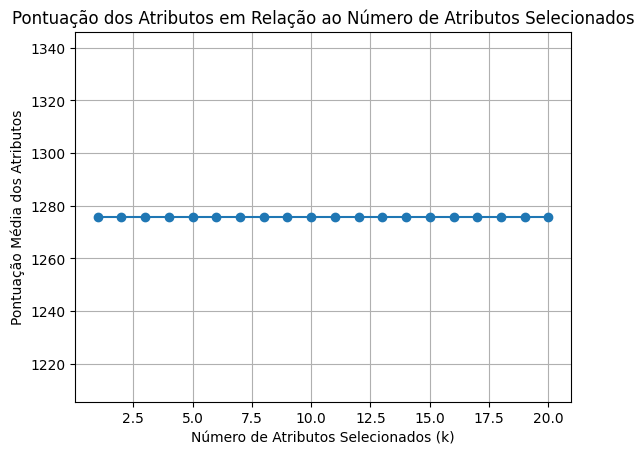

In [ ]:
# Lista para armazenar as pontuações dos atributos
scores = []

# Número máximo de atributos
max_features = X.shape[1]

# Testa diferentes valores de k
for k in range(1, max_features + 1):
    # Seleção de atributos com SelectKBest
    best_var = SelectKBest(score_func=f_classif, k=k)

    # Executa a função de pontuação em (X, y) e obtém os atributos selecionados
    fit = best_var.fit(X, y)

    # Armazena a pontuação média dos atributos selecionados
    scores.append(fit.scores_.mean())

# Plota o gráfico de linha das pontuações dos atributos em relação ao número de atributos selecionados
plt.plot(range(1, max_features + 1), scores, marker='o')
plt.xlabel('Número de Atributos Selecionados (k)')
plt.ylabel('Pontuação Média dos Atributos')
plt.title('Pontuação dos Atributos em Relação ao Número de Atributos Selecionados')
plt.grid(True)
plt.show()

O gráfico acima nos mostra que a média dos atributos não aumenta conforme o número de atributos selecionados, por isso, selecionaremos um número baixo de atributos, como k=5, por exemplo.

In [ ]:
# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=5)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", X.columns)

# Exibe as pontuações de cada atributos e os 5 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=X.columns))


Número original de atributos: 20

Número reduzido de atributos: 5

Atributos Originais: Index(['all_pro', 'pro_bowl', 'starter', 'carAV', 'drAV', 'games', 'pass_comp',
       'pass_att', 'pass_yards', 'pass_tds', 'pass_int', 'rush_att',
       'rush_yards', 'rush_tds', 'receptions', 'rec_yards', 'rec_tds',
       'interceptions', 'sacks', 'tackles'],
      dtype='object')

Scores dos Atributos Originais: [8766.727 7451.575 1050.377 1874.834 2120.382  624.594  173.539  156.929
  175.23   208.416  132.356  290.135  299.281  332.92   389.177  373.298
  416.448  172.235  274.625  231.554]

Atributos Selecionados: ['all_pro' 'pro_bowl' 'starter' 'carAV' 'drAV']


Da mesma forma, procuramos os nomes dos atributos não selecionados, de modo a facilitar a exclusão das colunas dos dados de entrada do modelo.

In [ ]:
# Supondo que 'fit' é o seletor de características ajustado
selected_indices = fit.get_support(indices=True)
all_indices = range(len(X.columns))
unselected_indices = list(set(all_indices) - set(selected_indices))

# Obter os nomes dos atributos não selecionados
unselected_attributes = X.columns[unselected_indices]

print("\nNomes dos Atributos Não Selecionados:")
print(unselected_attributes)


Nomes dos Atributos Não Selecionados:
Index(['games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int',
       'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards',
       'rec_tds', 'interceptions', 'sacks', 'tackles'],
      dtype='object')


In [ ]:
X = X.drop(columns=['games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int',
       'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards',
       'rec_tds', 'interceptions', 'sacks', 'tackles'])
X

,all_pro,pro_bowl,starter,carAV,drAV
464,0,0,0,1.0,1.0
465,0,0,0,0.0,0.0
466,0,0,3,22.0,0.0
467,0,0,0,3.0,3.0
468,0,0,2,8.0,7.0
...,...,...,...,...,...
8970,0,0,0,0.0,0.0
8971,0,0,1,4.0,4.0
8972,0,0,0,0.0,0.0
8973,0,0,0,0.0,0.0


Fazendo o mesmo com os dados não vistos...

In [ ]:
dados_nao_vistos = dados_nao_vistos.drop(columns=['games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int',
       'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards',
       'rec_tds', 'interceptions', 'sacks', 'tackles'])
dados_nao_vistos.sample(10)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV
427,Percy Snow,LB,False,0,0,1,10.0,9.0
79,Perry Smith,DB,False,0,0,3,18.0,16.0
142,Jack Smith,DB,False,0,0,0,0.0,0.0
138,Jessie Green,WR,False,0,0,0,0.0,0.0
313,Chuck Wiley,DE,False,0,0,1,13.0,6.0
76,Rob Morris,LB,False,0,0,4,24.0,24.0
8,Chris McAlister,DB,False,1,3,9,72.0,72.0
294,Carlos Francis,WR,False,0,0,0,0.0,0.0
264,DeAngelo Tyson,DT,False,0,0,0,6.0,6.0
207,Angelo Crowell,LB,False,0,0,3,19.0,19.0


Iniciamos o processo de separação do dataset. A divisão para dados de teste será de 20%, com uma estratificação em 'y', garantindo, assim, que a distribuição dos rótulos seja mantida nos conjuntos de treinamento e teste, bastante importante para conjuntos de dados desbalanceados, como é o caso do dataframe aborado. Além disso, faremos uma validação cruzada que é importante por vários motivos, dentre eles:

*   **Avaliação imparcial do modelo:** Ao usar diferentes partições dos dados para treinamento e teste, a validação cruzada fornece uma avaliação mais imparcial e robusta do desempenho do modelo, ajudando a evitar o overfitting e o underfitting.
*   **Avaliação da generalização:** A validação cruzada fornece uma estimativa mais confiável da capacidade de generalização do modelo para novos dados, pois ele é avaliado em várias partições dos dados, em vez de depender de apenas uma divisão específica.



In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 52 # semente aleatória

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Modelagem e treinamento

Após a separação dos dados em treinamento e teste, passamos para a etapa de avaliação dos diversos tipos de modelo disponíveis, a fim de selecionar o mais adequado para o problema em questão.

Dentre os modelos, citamos: Regressão Logística (LR), Classificador K-NN (KNN), Classificador de Árvore de Decisão (CART), Naive Bayes (NB), Máquina de Vetor Suporte (SVM) e métodos ensemble como Classificador Bagging, Classificador Random Forest (RF), Classificador Extra Trees (ET), Classificador AdaBoost (Ada) e Classificador Gradient Boosting (GB). Há também um Classificador por Votação que combina as previsões de vários modelos.

LR: 0.993978 (0.002581)
KNN: 0.993244 (0.003296)
CART: 0.991334 (0.003909)
NB: 0.964896 (0.007778)
SVM: 0.993831 (0.003135)
Bagging: 0.993537 (0.003783)
RF: 0.993831 (0.003929)
ET: 0.993538 (0.003726)
Ada: 0.992656 (0.002706)
GB: 0.993390 (0.003300)
Voting: 0.994418 (0.002526)


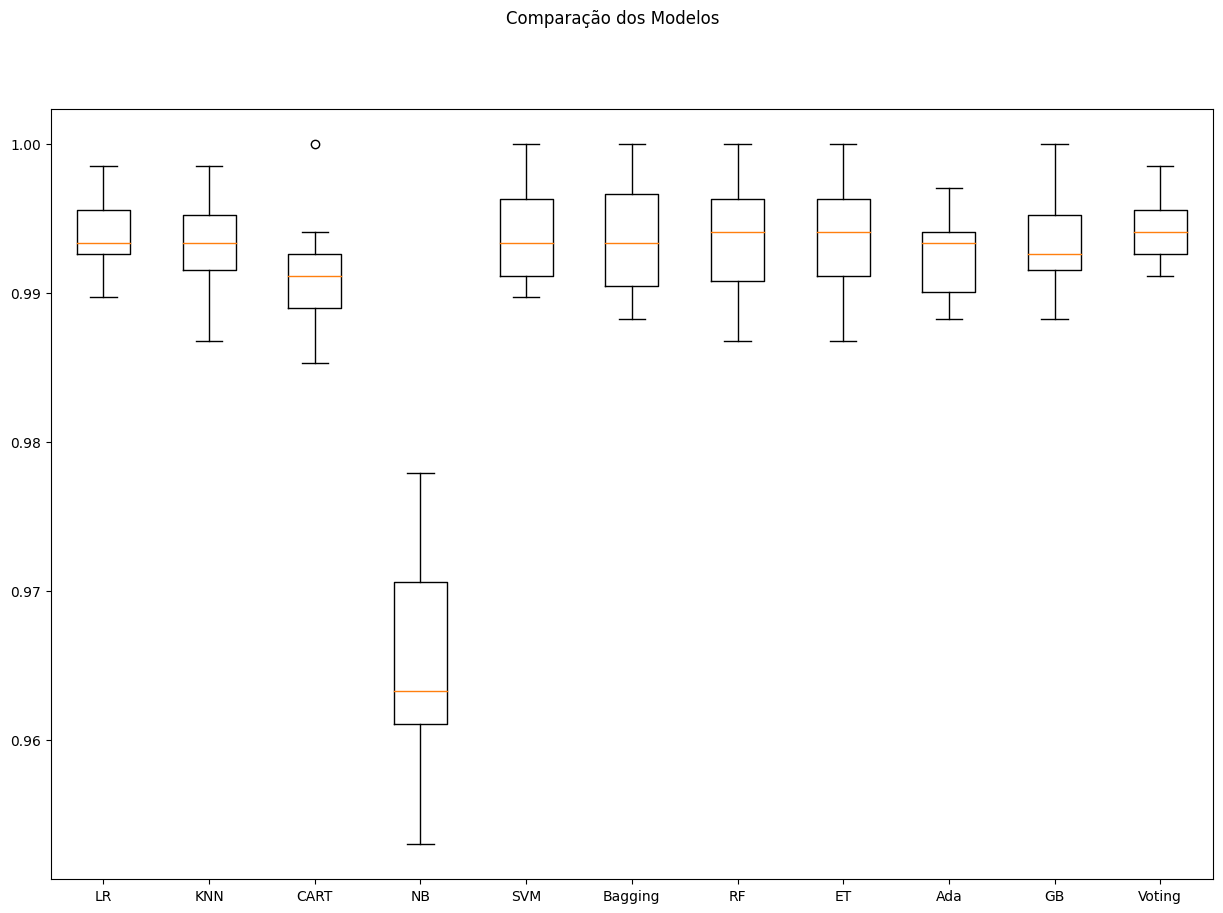

In [ ]:
np.random.seed(52) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com base nos resultados, todos os modelos atingiram uma alta precisão (acima de 0,96) com pequenos desvios padrão, indicando um bom desempenho geral.

O classificador por votação tem uma boa pontuação média (0,9944), com o menor desvio padrão, sugerindo que ele é um modelo robusto neste caso.

Posteriormente, propomos duas transformações de dados: padronização (usando StandarScaler) e normalização (usando MinMaxScaler). A padronização dimensiona os recursos dos dados para ter uma média de 0 e um desvio padrão de 1. Já, a normalização dimensiona os valores das linhas para uma faixa entre 0 e 1. Em seguida, criamos pipelines diferentes no código para cada modelo, alguns com padronização, outros com normalização e o restante sem nenhum pré-processamento aplicado aos dados originais.

LR-orig: 0.99398 (0.00258)
KNN-orig: 0.99324 (0.00330)
CART-orig: 0.99133 (0.00391)
NB-orig: 0.96490 (0.00778)
SVM-orig: 0.99383 (0.00314)
Bag-orig: 0.99354 (0.00378)
RF-orig: 0.99383 (0.00393)
ET-orig: 0.99354 (0.00373)
Ada-orig: 0.99266 (0.00271)
GB-orig: 0.99339 (0.00330)
Vot-orig: 0.99442 (0.00253)
LR-padr: 0.99383 (0.00235)
KNN-padr: 0.99383 (0.00314)
CART-padr: 0.99133 (0.00407)
NB-padr: 0.96490 (0.00778)
SVM-padr: 0.99368 (0.00389)
Bag-padr: 0.99324 (0.00316)
RF-padr: 0.99339 (0.00395)
ET-padr: 0.99368 (0.00360)
Ada-padr: 0.99266 (0.00271)
GB-padr: 0.99339 (0.00330)
Vot-padr: 0.99398 (0.00325)
LR-norm: 0.99383 (0.00269)
KNN-norm: 0.99427 (0.00331)
CART-norm: 0.99133 (0.00331)
NB-norm: 0.96490 (0.00778)
SVM-norm: 0.99413 (0.00420)
Bag-norm: 0.99324 (0.00411)
RF-norm: 0.99354 (0.00288)
ET-norm: 0.99354 (0.00367)
Ada-norm: 0.99266 (0.00271)
GB-norm: 0.99339 (0.00343)
Vot-norm: 0.99427 (0.00350)


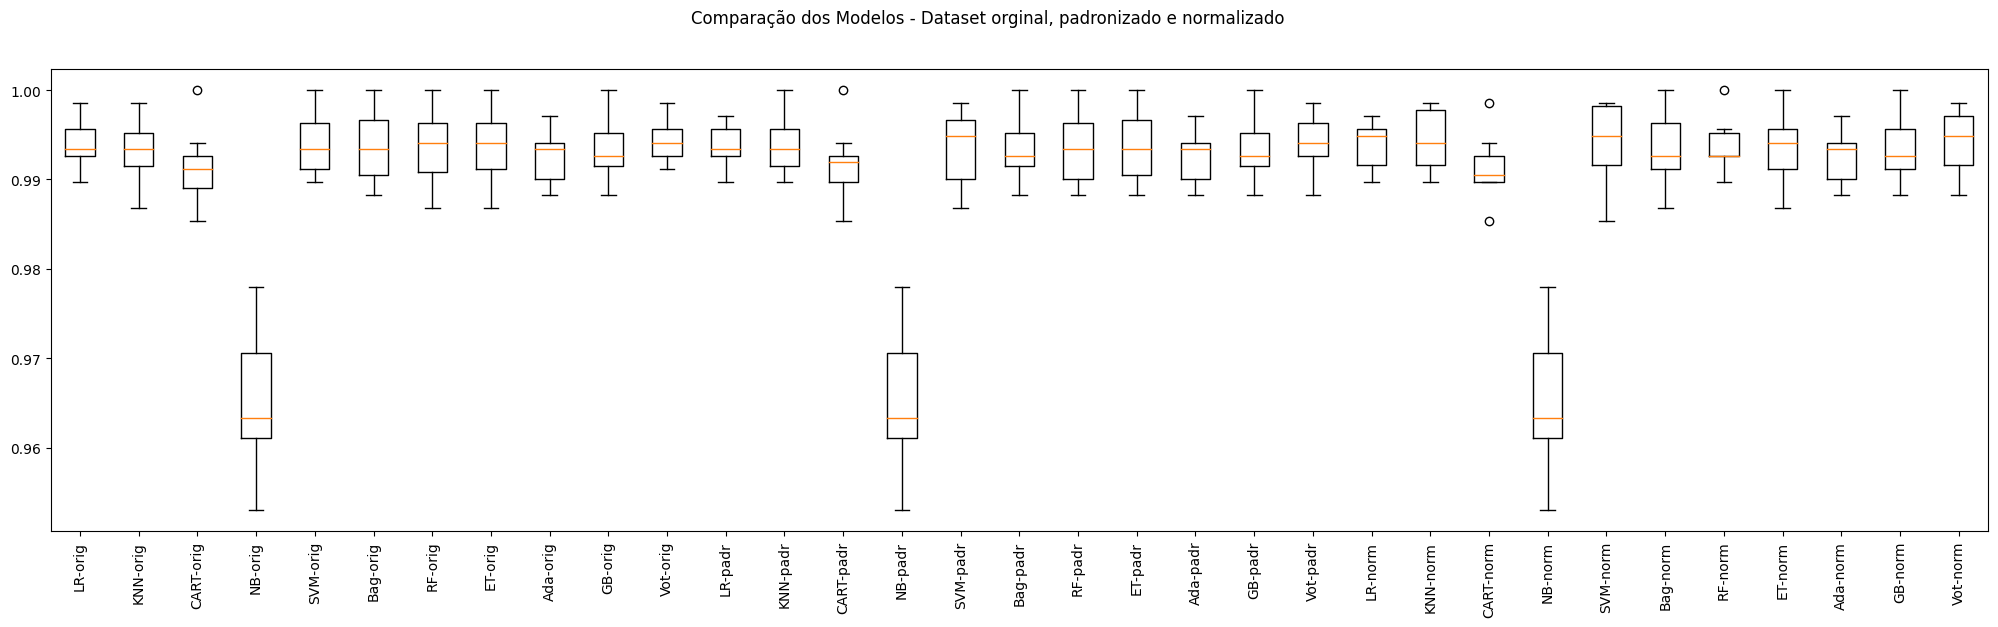

In [ ]:
np.random.seed(52) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.5f (%.5f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 5 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Podemos, também, buscar a otimização de hiperparâmetros. Modelos como K-Nearest Neighbors (KNN), Random Forest e Gradient Boosting também podem ser bons candidatos para otimização, pois possuem diversos hiperparâmetros que podem influenciar significativamente o desempenho.

A título de ilustração, vamos aplicar a técnica do Grid Search, na qual todas as combinações possíveis de valores predefinidos para os hiperarametros selecionados.

Os seguintes parâmetros serão otimizados:


*   **KNN__n_neighbors:** define o número de vizinhos mais próximos utilizados para a classificação.
*   **KNN__metric:** testa diferentes métricas de distância para o classificador KNN: euclidiana, manhattan e minkowski.


In [ ]:
# Tuning do KNN

np.random.seed(52) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.993538 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-padr - Melhor: 0.994272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-norm - Melhor: 0.994566 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 11}


# Avaliação de Resultados

Agora, analisamos os resultados de três modelos diferentes a partir das métricas: a **acurácia**, o **f1-score**, a **precisão**, a **matriz de confusão** e **área sob a curva ROC (AUC-ROC)**.

A acurácia é uma métrica simples que mede a proporção de previsões corretas feitas pelo modelo. Matematicamente, a acurácia é calculada como o número de previsões corretas dividido pelo número total de previsões. Ela é útil quando as classes estão balanceadas no conjunto de dados. Entretanto, uma acurácia alta pode ser enganosa, visto que a mesma pode ser obtida simplesmente prevendo a classe majoritária em todas as instâncias.

O F1-score é uma métrica que combina precisão e recall em um único número. É a média harmônica dessas duas métricas. A precisão mede a proporção de instâncias classificadas como positivas que são realmente positivas. O recall, por outro lado, mede a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. Ele é útil quando há um desequilíbrio entre as classes no conjunto de dados, pois leva em consideração tanto os falsos positivos quanto os falsos negativos.

A precisão é a proporção de instâncias positivas previstas corretamente em relação ao total de instâncias positivas previstas pelo modelo. Ela é útil quando o foco está em minimizar os falsos positivos, ou seja, quando é importante garantir que as instâncias classificadas como positivas sejam realmente positivas.


A matriz de confusão, é uma tabela que mostra as frequências de classificação corretas e incorretas feitas pelo modelo para cada classe. Ela fornece informações detalhadas sobre como o modelo está performando para cada classe individualmente, incluindo falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos.

Já, a AUC-ROC é uma medida da capacidade do modelo de distinguir entre classes. Quanto maior a AUC-ROC, melhor o modelo está em separar as classes. É uma métrica útil quando o conjunto de dados está desbalanceado.



1.   VotingClassifier sem transformação de dados



In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo -> VOTING
model = VotingClassifier(bases)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.994128009395185


F1-Score: 0.7368421052631579


Precisão: 0.875


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
8 falsos negativos, 14 verdadeiros positivos


AUC-ROC: 0.8175869341841977




2.   K-Nearest Neighbors sem transformação de dados



In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo -> KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.9911920140927775


F1-Score: 0.5454545454545455


Precisão: 0.8181818181818182


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
13 falsos negativos, 9 verdadeiros positivos


AUC-ROC: 0.703950570547834


3.   Regressão Logística com dataset padronizado



In [ ]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.992953611274222


F1-Score: 0.6666666666666665


Precisão: 0.8571428571428571


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
10 falsos negativos, 12 verdadeiros positivos


AUC-ROC: 0.7721323887296523


Após a análise dos 3 tipos diferentes de modelo, vimos que a melhor opção é a de VotingClassifier, sem a necessidade de transformação de dados.

**Conclusão**

Um resultado com uma acurácia de 0,994, um F1-score de 0,737, uma precisão de 0,875, uma AUC-ROC de 0,818 e uma matriz de confusão de [[1679, 2], [8, 14]] indica um desempenho geral muito bom do modelo de classificação.

A acurácia com esse valor indica que a grande maioria das previsões feitas pelo modelo estão corretas. Uma pontuação de F1-score de 0,737 é bastante alta e indica um bom equilíbrio entre precisão e recall no modelo. A precisão, também alta, mostra que o modelo está fazendo um bom trabalho em minimizar os falsos positivos. O valor de 0,818 de AUC-ROC é um desempenho bem decente, mostrando que o modelo está conseguindo separar as classes positivas e negativas. Por último, a matriz de confusão nos informa que o modelo errou muito pouco em suas classificações.

Em resumo, o resultado apresentado mostra um desempenho promissor, indicando um modelo bem calibrado e eficaz na classificação das instâncias do conjunto de dados, com um baixo número de erros, um bom equilíbrio entre precisão e recall e uma capacidade robusta de generalização. Além disso, não foi observado nenhum problema tanto de underfitting, quanto de overfitting, visto que o modelo não teve um desempenho muito melhor nos dados de treinamento do que nos dados de teste -típico do overfitting-, nem teve um desempenho ruim tanto nos dados de treinamento quanto nos dados de teste -que caracterizam o underfitting-. No entanto, é essencial continuar refinando e validando esses modelos à medida que novos dados se tornam disponíveis e o contexto do problem evolui, ou seja, será que a régua para ser hall da fama continuará sendo a mesma pelos próximos 10, 20 ou 30 anos?

# Extra

Vamos trabalhar novamente com o mesmo modelo, simulando a aplicação do mesmo em dados não vistos citados anteriormente

In [ ]:
entrada = pd.DataFrame(dados_nao_vistos)
array_entrada = entrada.values

array_entrada[0:10]

array([['Rich Wingo', 'LB', False, 0, 0, 4, 21.0, 21.0],
       ['Brad Muster', 'RB', False, 0, 0, 5, 31.0, 29.0],
       ['Chester Pitts', 'OT', False, 0, 0, 7, 43.0, 42.0],
       ['Guy Bingham', 'C', False, 0, 0, 1, 17.0, 17.0],
       ['Larry Kolic', 'LB', False, 0, 0, 0, 2.0, 2.0],
       ['Keenan Lewis', 'DB', False, 0, 0, 3, 23.0, 11.0],
       ['Andy Hawkins', 'LB', False, 0, 0, 2, 20.0, 17.0],
       ['Nate Hill', 'DE', False, 0, 0, 0, 0.0, 0.0],
       ['Seth McKinney', 'C', False, 0, 0, 3, 21.0, 15.0],
       ['Duane Clemons', 'DE', False, 0, 0, 5, 39.0, 11.0]], dtype=object)

In [ ]:
model = VotingClassifier(bases)
model.fit(X_train, y_train)

X_entrada = array_entrada[:,3:8].astype(float)
y_entrada = array_entrada[:,2].astype(bool)

saidas = model.predict(X_entrada)

In [ ]:
acuracia = accuracy_score(y_entrada, saidas)
f1 = f1_score(y_entrada, saidas)
precision = precision_score(y_entrada, saidas)
cm = confusion_matrix(y_entrada, saidas)
auc_roc = roc_auc_score(y_entrada, saidas)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]

print(f"acurácia: {acuracia}")
print("\n")
print(f"f1-score: {f1}")
print("\n")
print(f"Precisão: {precision}")
print("\n")
print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")
print(f"AUC-ROC: {auc_roc}")

acurácia: 0.9935344827586207


f1-score: 0.7272727272727272


Precisão: 0.8


Matriz de Confusão:
457 verdadeiros negativos, 1 falsos positivos
2 falsos negativos, 4 verdadeiros positivos


AUC-ROC: 0.8322416302765647


Por último, iremos fazer um exercício de futurologia. Com o auxílio do modelo definido como o melhor, preveremos quais dos jogadores inelegíveis serão, provavelmente, membros do hall da fama.

In [ ]:
inelegiveis

,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,games,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
6688,Tom Brady,QB,2020.0,False,3,14,19,179.0,170.0,301.0,...,191.0,636.0,1043.0,25.0,3.0,65.0,0.0,0.0,0.0,0.0
6756,Drew Brees,QB,2020.0,False,1,13,19,167.0,26.0,287.0,...,243.0,498.0,752.0,25.0,8.0,74.0,1.0,0.0,0.0,0.0
6797,Steve Smith,WR,2016.0,False,2,5,14,103.0,92.0,219.0,...,0.0,57.0,387.0,2.0,1031.0,14731.0,81.0,0.0,0.0,0.0
6940,Julius Peppers,DE,2018.0,False,3,9,16,129.0,71.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,160.0,557.0
6949,Dwight Freeney,DE,2017.0,False,3,7,11,78.0,75.0,218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,126.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,Tremayne Anchrum,G,2020.0,False,0,0,0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11217,Stephen Sullivan,TE,2020.0,False,0,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11218,Tyrie Cleveland,WR,2020.0,False,0,0,0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,6.0,63.0,0.0,0.0,0.0,1.0
11219,Derrek Tuszka,LB,2020.0,False,0,0,0,1.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


Deletamos as colunas desnecessárias, segundo o feature selection feito anteriormente.

In [ ]:
inelegiveis = inelegiveis.drop(columns=['to','games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int',
       'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards',
       'rec_tds', 'interceptions', 'sacks', 'tackles'])

inelegiveis.sort_values(by='carAV', ascending=False)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV
6688,Tom Brady,QB,False,3,14,19,179.0,170.0
6756,Drew Brees,QB,False,1,13,19,167.0,26.0
7623,Aaron Rodgers,QB,False,3,9,12,151.0,151.0
7384,Philip Rivers,QB,False,0,8,15,149.0,24.0
8255,Matt Ryan,QB,False,1,4,13,140.0,140.0
...,...,...,...,...,...,...,...,...
11062,Julian Okwara,DE,False,0,0,0,0.0,0.0
10890,Trevon Wesco,TE,False,0,0,0,0.0,0.0
10889,Gary Jennings Jr,WR,False,0,0,0,0.0,0.0
11065,Brandon Jones,DB,False,0,0,0,0.0,0.0


In [ ]:
entrada_inelegiveis = pd.DataFrame(inelegiveis)
array_entrada_inelegiveis = entrada_inelegiveis.values

X_inelegiveis = array_entrada_inelegiveis[:,3:8].astype(float) # dados de entrada do modelo
y_inelegiveis = array_entrada_inelegiveis[:,2].astype(bool) # dados de saída do modelo
jogadores = array_entrada_inelegiveis[:,0].astype(str) # nome dos jogadores
posicoes = array_entrada_inelegiveis[:,1].astype(str) # posição dos jogadores

saidas = model.predict(X_inelegiveis)

# identificando os índices onde a saída é True
indices_hof = np.where(saidas == True)[0]

# criando um dicionário para armazenar jogadores por posição
jogadores_por_posicao = {}

# preenchendo o dicionário com os jogadores correspondentes às posições
for indice in indices_hof:
    posicao = posicoes[indice]
    jogador = jogadores[indice]
    if posicao not in jogadores_por_posicao:
        jogadores_por_posicao[posicao] = []
    jogadores_por_posicao[posicao].append(jogador)

# exibindo os jogadores agrupados por posição
print(f"{len(indices_hof)} Prováveis futuros membros do Hall da Fama por posição\n")
for posicao, jogadores in jogadores_por_posicao.items():
    print(f"Posição: {posicao}")
    for jogador in jogadores:
        print(jogador)
    print()

28 Prováveis futuros membros do Hall da Fama por posição

Posição: QB
Tom Brady
Drew Brees
Philip Rivers
Ben Roethlisberger
Aaron Rodgers
Matt Ryan
Cam Newton
Russell Wilson

Posição: DE
Julius Peppers
Dwight Freeney
Calais Campbell
J.J. Watt

Posição: WR
Andre Johnson
Larry Fitzgerald

Posição: LB
Terrell Suggs
DeMarcus Ware
Von Miller
Bobby Wagner

Posição: TE
Jason Witten

Posição: OT
Jahri Evans
Joe Thomas
Marshal Yanda

Posição: DB
Darrelle Revis
Earl Thomas
Patrick Peterson

Posição: C
Maurkice Pouncey

Posição: DT
Geno Atkins
Aaron Donald

